In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

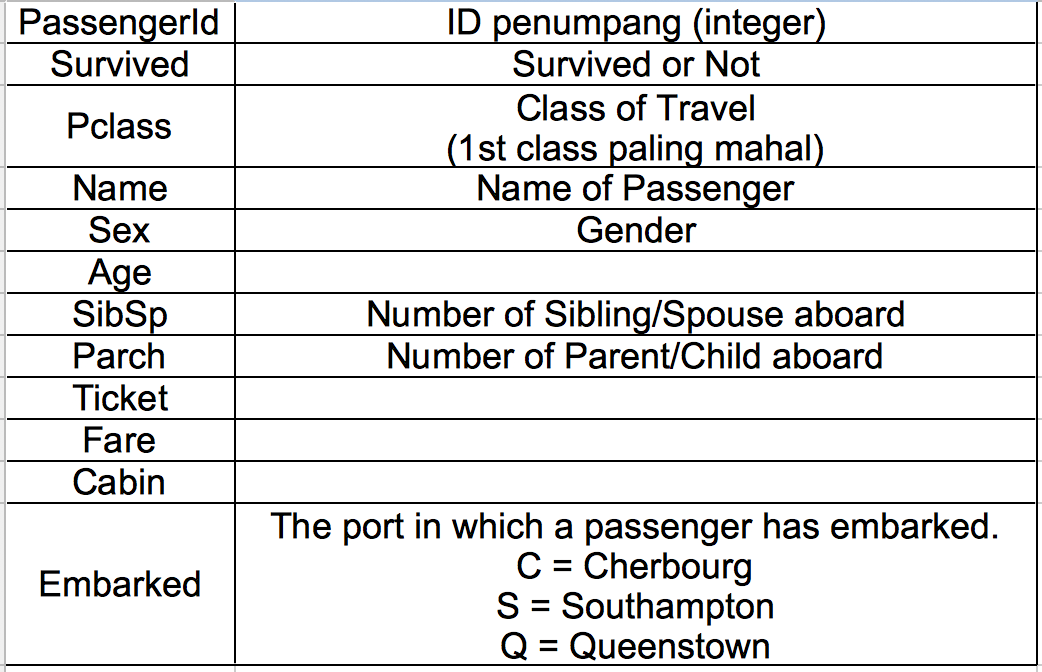

In [3]:
illustration.nomenklatur

In [9]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.drop(columns=["Name", "Ticket"], inplace=True)

In [11]:
from jcopml.plot import  plot_missing_value

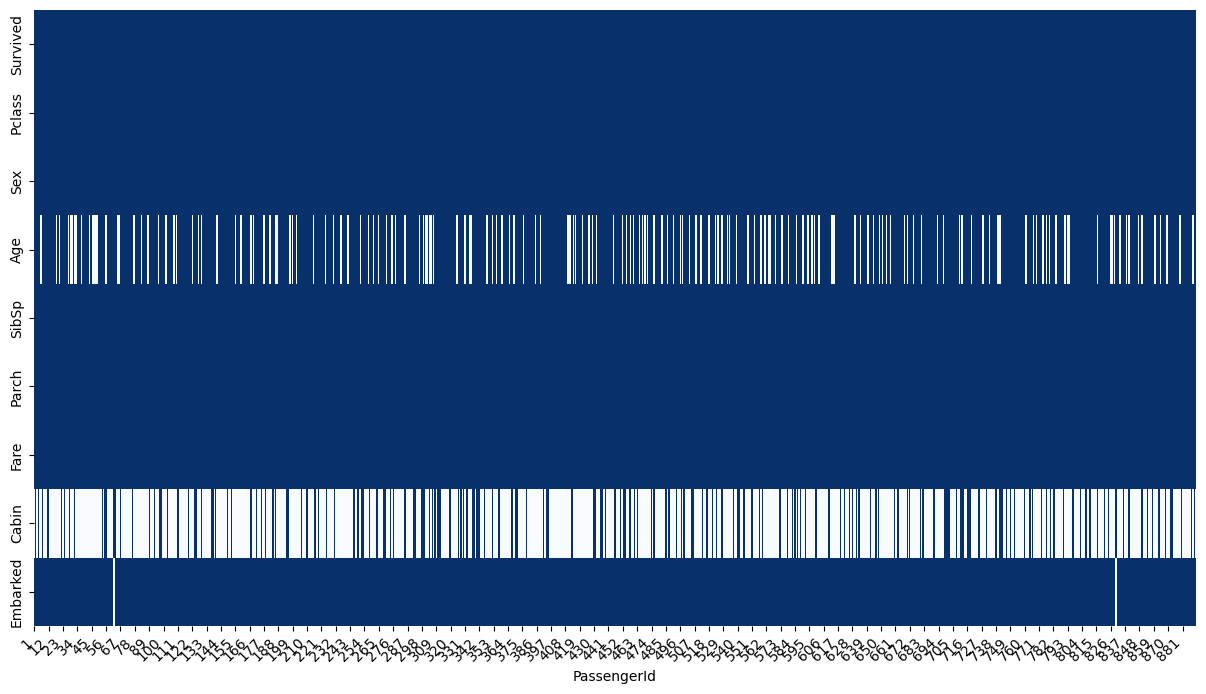

In [12]:
plot_missing_value(df)

In [13]:
df.drop(columns=["Age", "Cabin"], inplace=True)

In [14]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df.fillna({"Embarked": "S"}, inplace=True)

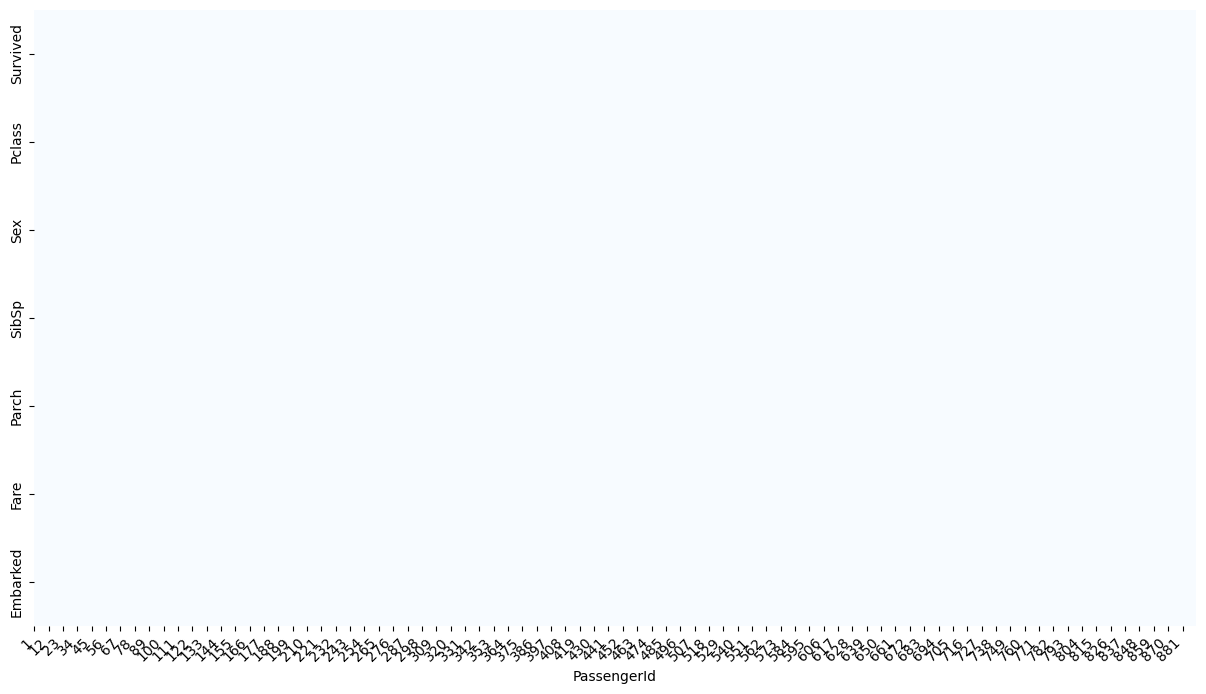

In [17]:
plot_missing_value(df)

In [18]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,1,0,7.2500,S
2,1,1,female,1,0,71.2833,C
3,1,3,female,0,0,7.9250,S
4,1,1,female,1,0,53.1000,S
5,0,3,male,0,0,8.0500,S


In [19]:
# X = kolom input/feature
# y = kolom target

X = df.drop(columns="Survived")
y = df.Survived

# One hot encoding categorical
X = pd.get_dummies(X, columns=["Pclass", "Sex", "Embarked"])

In [20]:
X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,1,0,1,0,0
3,0,0,7.9250,0,0,1,1,0,0,0,1
4,1,0,53.1000,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,1,0,0,1


## Intro Scikit-learn

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.score(X, y)

0.8787878787878788